# Milestone Two 

RMSE: 36575204454.10
R²: 0.516


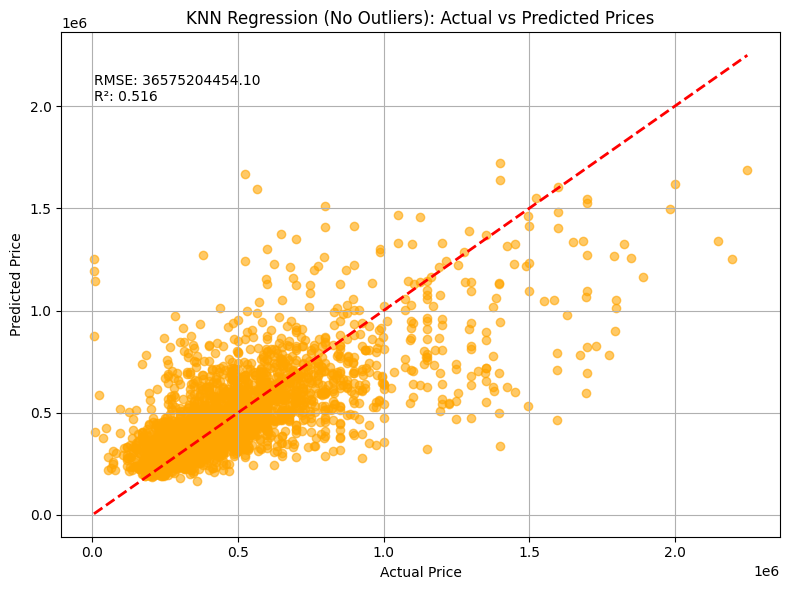

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("austinHousingData.csv")  # update path if needed

# Select numerical features and target
features = [
    'livingAreaSqFt', 'lotSizeSqFt', 'yearBuilt', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories', 'garageSpaces',
    'propertyTaxRate', 'avgSchoolRating'
]
target = 'latestPrice'

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Remove outliers (top 1% most expensive houses)
price_threshold = df_model[target].quantile(0.99)
df_filtered = df_model[df_model[target] <= price_threshold]

# Split into features and target
X = df_filtered[features]
y = df_filtered[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')  # Try 'manhattan' or 'chebyshev'
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression (No Outliers): Actual vs Predicted Prices")
plt.text(x=y_test.min(), y=y_test.max()*0.9, s=f"RMSE: {rmse:.2f}\nR²: {r2:.3f}", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


Gradient Boosting RMSE: 28776581621.07
Gradient Boosting R²: 0.619


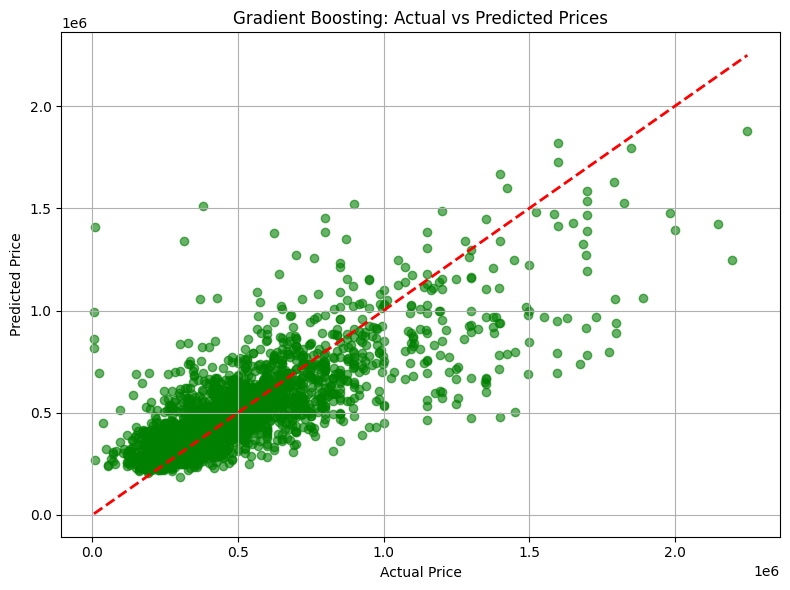

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("austinHousingData.csv")

# Select features and target
features = [
    'livingAreaSqFt', 'lotSizeSqFt', 'yearBuilt', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories', 'garageSpaces',
    'propertyTaxRate', 'avgSchoolRating'
]
target = 'latestPrice'

# Drop missing values
df_model = df[features + [target]].dropna()

# Remove outliers (top 1% of price)
price_threshold = df_model[target].quantile(0.99)
df_filtered = df_model[df_model[target] <= price_threshold]

# Define X and y
X = df_filtered[features]
y = df_filtered[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting RMSE: {rmse:.2f}")
print(f"Gradient Boosting R²: {r2:.3f}")

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


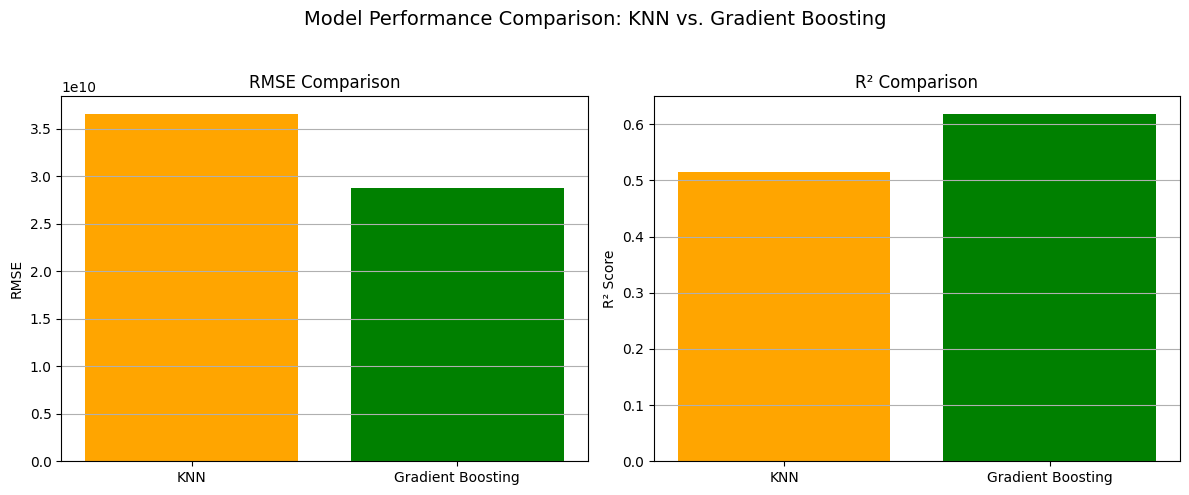

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("austinHousingData.csv")

# Define features and target
features = [
    'livingAreaSqFt', 'lotSizeSqFt', 'yearBuilt', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories', 'garageSpaces',
    'propertyTaxRate', 'avgSchoolRating'
]
target = 'latestPrice'

# Drop missing values and remove outliers
df_model = df[features + [target]].dropna()
price_threshold = df_model[target].quantile(0.99)
df_filtered = df_model[df_model[target] <= price_threshold]

# Prepare features and target
X = df_filtered[features]
y = df_filtered[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ----- KNN Model -----
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# ----- Gradient Boosting Model -----
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
rmse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# ----- Bar Chart -----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RMSE comparison
axes[0].bar(['KNN', 'Gradient Boosting'], [rmse_knn, rmse_gbr], color=['orange', 'green'])
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')
axes[0].grid(axis='y')

# R² comparison
axes[1].bar(['KNN', 'Gradient Boosting'], [r2_knn, r2_gbr], color=['orange', 'green'])
axes[1].set_title('R² Comparison')
axes[1].set_ylabel('R² Score')
axes[1].grid(axis='y')

plt.suptitle("Model Performance Comparison: KNN vs. Gradient Boosting", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("austinHousingData.csv")

# Select features for clustering
features = [
    'livingAreaSqFt', 'lotSizeSqFt', 'yearBuilt', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories', 'garageSpaces',
    'propertyTaxRate', 'avgSchoolRating'
]
df_model = df[features].dropna()

# Remove outliers
df_model = df_model[df_model['livingAreaSqFt'] <= df_model['livingAreaSqFt'].quantile(0.99)]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Sample down to avoid memory error
X_sampled = resample(X_scaled, n_samples=2000, random_state=42)

# ----- DBSCAN -----
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sampled)

# Compute silhouette score (excluding noise points)
dbscan_core_mask = dbscan_labels != -1
if len(set(dbscan_labels)) > 1 and dbscan_core_mask.sum() > 1:
    silhouette_dbscan = silhouette_score(X_sampled[dbscan_core_mask], dbscan_labels[dbscan_core_mask])
else:
    silhouette_dbscan = "N/A (only one cluster or too much noise)"

# ----- Agglomerative Clustering -----
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_sampled)
silhouette_agglo = silhouette_score(X_sampled, agglo_labels)

# Print results
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agglo}")


DBSCAN Silhouette Score: 0.2687416058248998
Agglomerative Clustering Silhouette Score: 0.2785401959728513


Silhouette Score (K-Means): 0.213


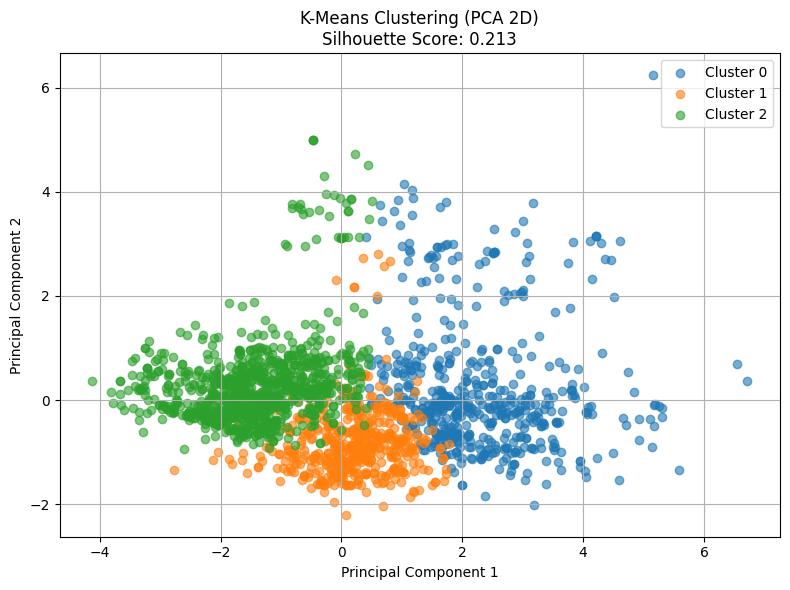

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("austinHousingData.csv")

# Select relevant features for clustering
features = [
    'livingAreaSqFt', 'lotSizeSqFt', 'yearBuilt', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories', 'garageSpaces',
    'propertyTaxRate', 'avgSchoolRating'
]
df_model = df[features].dropna()

# Optional: remove extreme outliers in living area
df_model = df_model[df_model['livingAreaSqFt'] <= df_model['livingAreaSqFt'].quantile(0.99)]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Sample the dataset to reduce memory usage
X_sampled = resample(X_scaled, n_samples=2000, random_state=42)

# Run K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_sampled)

# Compute silhouette score
silhouette_kmeans = silhouette_score(X_sampled, kmeans_labels)
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.3f}")

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)

# Plot K-Means clusters
plt.figure(figsize=(8, 6))
for label in set(kmeans_labels):
    mask = kmeans_labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f"Cluster {label}", alpha=0.6)
plt.title(f"K-Means Clustering (PCA 2D)\nSilhouette Score: {silhouette_kmeans:.3f}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
